In [ ]:
import tensorflow as tf
from tensorflow import keras


cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images  = test_images / 255.0

train_images = tf.reshape(train_images, (50000, 32, 32, 3))
test_images  = tf.reshape(test_images, (10000, 32, 32, 3))

print(train_images.shape)
print(test_images.shape)


# model
model = keras.models.Sequential()

# input is with the shape of (32, 32, 3)
model.add(tf.keras.Input(shape=(32, 32, 3)))

# Convolve with 1 (7x7) kernel 
# Output: (26x26x1)
model.add(keras.layers.Conv2D(32, (7, 7), activation='relu'))

# Convolve with 2 (7x7) kernel 
# Output: (20x20x2)
model.add(keras.layers.Conv2D(64, (7, 7), activation='relu'))

# Convolve with 3 (7x7) kernel 
# Output: (14x14x3)
model.add(keras.layers.Conv2D(128, (7, 7), activation='relu'))

# Convolve with 4 (7x7) kernel 
# Output: (7x7x4)
model.add(keras.layers.Conv2D(256, (7, 7), activation='relu'))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='softmax'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_data = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    batch_size=1024, epochs=150, verbose=2)

170500096/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        4736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        100416    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       401536    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         1605888   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________

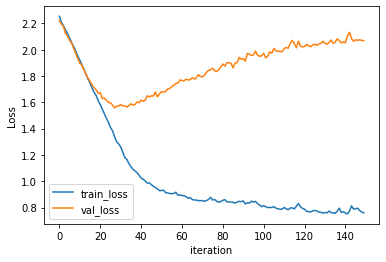

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.plot(history_data.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

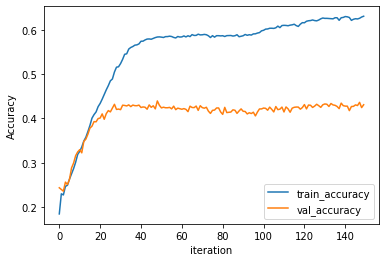

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.plot(history_data.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()